In [1]:
import numpy as np
import sys

In [7]:
# Construct chess board
chess_board = np.reshape(np.linspace(dtype=int, num=16, start=0, stop=15), (4,4))
# Constrain moves to chess board
chess_board_index = [i for i in np.ndindex(4,4)] 
chess_board

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [8]:
# Define action space for knight
def knight_action(x, y):
    # Create empty array for valid moves
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    # Define possible moves
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    # Mark current location
    valid_actions[(x,y)] = -1
    
    # Report valid moves based on current location
    for i in action_space:
        if i in chess_board_index:
            valid_actions[i] = 1
    
    # Report indices of valid moves
    valid_indices = np.dstack(np.where(valid_actions == 1))[0]
    
    return valid_actions, valid_indices

In [9]:
# Define action space for knight
def knight_action(x, y):
    # Create empty array for valid moves
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    # Define possible moves
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    # Mark current location
    valid_actions[(x,y)] = -1
    
    # Report valid moves based on current location
    for i in chess_board_index:
        if i in action_space:
            valid_actions[i] = 1
    
    # Report indices of valid moves
    valid_indices = np.dstack(np.where(valid_actions == 1))[0]
    
    return valid_actions, valid_indices

In [10]:
# Select an action with uniform probability based on current location
def action_select(position):
    # Get valid indices for next move
    _, valid_indices = knight_action(position[0], position[1])
    # Choose random action
    random_action = np.random.choice(valid_indices.shape[0])
    # Indices of next move
    x, y = valid_indices[random_action][0], valid_indices[random_action][1]
    
    return x, y

In [11]:
# Get value of key on chess board at position (x,y) 
def get_key(position):
    return chess_board[position]

In [12]:
def get_score(trials, print_stat=False):
    total_score = 0
    position = (0,0)
    for i in range(trials):
        trial = i + 1
        position = action_select(position)
        score = get_key(position)
        total_score += score
        if print_stat:
            print_string = (trial, position, score, total_score)
            print("{}\n".format(print_string))
            valid_actions = np.zeros(shape=(4,4), dtype=int)
            valid_actions[position] = -1
            print("{}\n".format(valid_actions))
    return total_score
        

In [13]:
def get_modulo_value(moves, modulo, print_stat=False):
    running_sum, modulos  = [], []
    for i in range(1,(moves+1)):
        score = get_score(moves, print_stat=False)
        
        # Add current score to running sum
        if len(running_sum) > 0:
            sum_with_prev = score + running_sum[-1]
        else:
            sum_with_prev = score

        # store modulo values
        score_modulo = sum_with_prev % modulo
        running_sum.append(sum_with_prev)
        modulos.append(score_modulo)

        if print_stat: print(i, moves, score, score_modulo, running_sum, modulos)
    return running_sum, modulos

In [16]:
# Since results vary, run sampling inference
def sample_modulo_results(moves, modulo, samples=1000, print_stat=False):
    means, stds = [], []
    for i in range(samples):
        _, results = get_modulo_value(moves, modulo, print_stat=print_stat)
        modulo_mu = np.mean(results)
        modulo_std = np.std(results)
        means.append(modulo_mu)
        stds.append(modulo_std)
        if i % 100 == 0:
            print("{}/{} iterations complete | mean : {} std: {}".format(i, samples, np.mean(means), np.std(stds)))
    return np.mean(means), np.std(stds)

In [50]:
# For last two questions
def conditional_sample_modulo_results(moves, modulo_1, modulo_2, samples=1000, print_stat=False):
    total_1, total_2 = 0, 0
    for i in range(samples):
        running_sum, _ = get_modulo_value(moves, modulo_1, print_stat=print_stat)
        running_sum = running_sum[-1]
        
        # If the sum is divisible by first number, check if is it also divisible be the second
        if running_sum % modulo_1 == 0:
            total_1 += 1
            if running_sum % modulo_2 == 0:
                total_2 += 1
        # Logging for progress 
        if i > 1 and (i % 1000 == 0):
            print("{}/{} iterations complete | total_1 : {} total_2: {}".format(i, samples, total_2, total_1))
            
    # Probability that sum is divisible by second number, given that it is divisble by first
    probability = 1.0*total_2/total_1
    print("{}/{} probability {}".format(total_2, total_1, probability))
    return probability

In [45]:
%%time
conditional_sample_modulo_results(16, 13, 5, samples=10000, print_stat=False)

1000/10000 iterations complete | total_1 : 8 total_2: 81 prob: 0.09876543209876543
2000/10000 iterations complete | total_1 : 27 total_2: 159 prob: 0.16981132075471697
3000/10000 iterations complete | total_1 : 41 total_2: 230 prob: 0.1782608695652174
4000/10000 iterations complete | total_1 : 57 total_2: 301 prob: 0.1893687707641196
5000/10000 iterations complete | total_1 : 72 total_2: 377 prob: 0.1909814323607427
6000/10000 iterations complete | total_1 : 94 total_2: 462 prob: 0.20346320346320346
7000/10000 iterations complete | total_1 : 104 total_2: 535 prob: 0.19439252336448598
8000/10000 iterations complete | total_1 : 117 total_2: 614 prob: 0.19055374592833876
9000/10000 iterations complete | total_1 : 132 total_2: 706 prob: 0.18696883852691218
154/782 probability 0.1969309462915601
CPU times: user 1min 38s, sys: 1.09 s, total: 1min 39s
Wall time: 1min 40s


0.1969309462915601

In [ ]:
%%time
conditional_sample_modulo_results(512, 43, 7, samples=100, print_stat=False)

In [46]:
%%time
conditional_sample_modulo_results(512, 43, 7, samples=100, print_stat=False)

0/2 probability 0.0
CPU times: user 17min 28s, sys: 11.1 s, total: 17min 39s
Wall time: 17min 50s


0.0

0.1728395061728395

In [19]:
%%time
sample_modulo_results(512, 311, samples=100, print_stat=False)

0/100 iterations complete | mean : 157.248046875 std: 0.0
CPU times: user 17min 19s, sys: 10.9 s, total: 17min 30s
Wall time: 17min 42s


(154.68896484375, 1.5820478337997763)

In [18]:
%%time
sample_modulo_results(512, 311, samples=100, print_stat=False)

0/100 iterations complete | mean : 150.537109375 std: 0.0
CPU times: user 17min 8s, sys: 10.7 s, total: 17min 18s
Wall time: 17min 29s


(154.96550781249999, 1.4569587249554448)

In [17]:
%%time
sample_modulo_results(512, 311, samples=100, print_stat=False)

0/100 iterations complete | mean : 153.69921875 std: 0.0
CPU times: user 17min 51s, sys: 13 s, total: 18min 4s
Wall time: 18min 21s


(155.04218750000001, 1.7398404861557724)

In [151]:
%%time
sample_modulo_results(16, 13, samples=100000, print_stat=False)

0/10000 iterations complete | mean : 4.75 std: 0.0
1000/10000 iterations complete | mean : 5.999188311688312 std: 0.4430121364487866
2000/10000 iterations complete | mean : 6.023113443278361 std: 0.4439401505870123
3000/10000 iterations complete | mean : 6.024658447184272 std: 0.44865703386144257
4000/10000 iterations complete | mean : 6.013949637590603 std: 0.4453038018028587
5000/10000 iterations complete | mean : 6.010997800439912 std: 0.4461678175495174
6000/10000 iterations complete | mean : 6.007654974170972 std: 0.4452101619899116
7000/10000 iterations complete | mean : 6.009525424939294 std: 0.44702954798230493
8000/10000 iterations complete | mean : 6.007147544056993 std: 0.4436161850145056
9000/10000 iterations complete | mean : 6.006811743139651 std: 0.44400866218903673
CPU times: user 1min 43s, sys: 1.32 s, total: 1min 44s
Wall time: 1min 45s


(6.0056937499999998, 0.44513875384093887)

In [148]:
%%time
sample_modulo_results(16, 13, samples=10000, print_stat=False)

0 iterations complete
1000 iterations complete
2000 iterations complete
3000 iterations complete
4000 iterations complete
5000 iterations complete
6000 iterations complete
7000 iterations complete
8000 iterations complete
9000 iterations complete
CPU times: user 1min 45s, sys: 1.5 s, total: 1min 46s
Wall time: 1min 47s


(5.9970249999999998, 0.44323767499661942)

In [145]:
%%time
sample_modulo_results(16, 13, samples=10000, print_stat=False)

CPU times: user 1min 45s, sys: 1.22 s, total: 1min 46s
Wall time: 1min 47s


(6.0005812499999998, 0.44114936645406072)

In [144]:
%%time
sample_modulo_results(16, 13, samples=10000, print_stat=False)

CPU times: user 1min 43s, sys: 1.19 s, total: 1min 44s
Wall time: 1min 45s


(5.9874749999999999, 0.43477891971227461)

In [143]:
%%time
sample_modulo_results(16, 13, samples=1000, print_stat=False)

CPU times: user 10.5 s, sys: 160 ms, total: 10.6 s
Wall time: 10.7 s


(5.9357499999999996, 0.41273304246159265)

In [ ]:
%%time
sample_modulo_results(512, 311, samples=1000, print_stat=False)

0/1000 iterations complete | mean : 156.509765625 std: 0.0


In [113]:
# def get_modulo_value(moves, modulo, samples=1, print_stat=False):
#     for i in range(samples):
#         running_sum, modulos  = [], []
#         for i in range(1,(moves+1)):
#             score = get_score(moves, print_stat=False)
#             if len(running_sum) > 0:
#                 sum_with_prev = score + running_sum[-1]
#             else:
#                 sum_with_prev = score
                
#             score_modulo = sum_with_prev % modulo
#             running_sum.append(sum_with_prev)
#             modulos.append(score_modulo)
            
#             if print_stat: print(i, moves, score, score_modulo, running_sum, modulos)
#         return running_sum, modulos

In [23]:
# Return an array of values of running sum of s with specified remainder
# def get_modulo_value(moves, modulo, samples=100000, print_stat=False):
#     unique_s_with_modulo = []
#     for i in range(samples):
#         score = get_score(moves, print_stat=False)
#         if score % moves == modulo:
#             if score not in unique_s_with_modulo:
#                 if print_stat: print(i, score, moves, (score/moves))
#                 unique_s_with_modulo.append(score)
#     return unique_s_with_modulo

In [140]:
_, moves_16_mod_13 = get_modulo_value(16, 13, print_stat=False)
moves_16_mod_13
np.mean(moves_16_mod_13)

3.8125

In [109]:
moves_16_mod_13 = get_modulo_value(16, 13, print_stat=True)

1 16 97 6 [97] [6]
2 16 140 3 [97, 237] [6, 3]
3 16 140 0 [97, 237, 377] [6, 3, 0]
4 16 118 1 [97, 237, 377, 495] [6, 3, 0, 1]
5 16 118 2 [97, 237, 377, 495, 613] [6, 3, 0, 1, 2]
6 16 134 6 [97, 237, 377, 495, 613, 747] [6, 3, 0, 1, 2, 6]
7 16 119 8 [97, 237, 377, 495, 613, 747, 866] [6, 3, 0, 1, 2, 6, 8]
8 16 103 7 [97, 237, 377, 495, 613, 747, 866, 969] [6, 3, 0, 1, 2, 6, 8, 7]
9 16 134 11 [97, 237, 377, 495, 613, 747, 866, 969, 1103] [6, 3, 0, 1, 2, 6, 8, 7, 11]
10 16 136 4 [97, 237, 377, 495, 613, 747, 866, 969, 1103, 1239] [6, 3, 0, 1, 2, 6, 8, 7, 11, 4]
11 16 120 7 [97, 237, 377, 495, 613, 747, 866, 969, 1103, 1239, 1359] [6, 3, 0, 1, 2, 6, 8, 7, 11, 4, 7]
12 16 110 0 [97, 237, 377, 495, 613, 747, 866, 969, 1103, 1239, 1359, 1469] [6, 3, 0, 1, 2, 6, 8, 7, 11, 4, 7, 0]
13 16 128 11 [97, 237, 377, 495, 613, 747, 866, 969, 1103, 1239, 1359, 1469, 1597] [6, 3, 0, 1, 2, 6, 8, 7, 11, 4, 7, 0, 11]
14 16 100 7 [97, 237, 377, 495, 613, 747, 866, 969, 1103, 1239, 1359, 1469, 1597, 1697] [6

In [103]:
moves_16_mod_13 = get_modulo_value(16, 13, print_stat=True)

1 100 16 4 [2, 6]
2 131 16 3 [2, 6, 9]
3 124 16 12 [2, 6, 9, 21]
4 124 16 12 [2, 6, 9, 21, 33]
5 115 16 3 [2, 6, 9, 21, 33, 36]
6 143 16 15 [2, 6, 9, 21, 33, 36, 51]
7 125 16 13 [2, 6, 9, 21, 33, 36, 51, 64]
8 151 16 7 [2, 6, 9, 21, 33, 36, 51, 64, 71]
9 96 16 0 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71]
10 90 16 10 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81]
11 129 16 1 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81, 82]
12 117 16 5 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81, 82, 87]
13 100 16 4 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81, 82, 87, 91]
14 119 16 7 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81, 82, 87, 91, 98]
15 131 16 3 [2, 6, 9, 21, 33, 36, 51, 64, 71, 71, 81, 82, 87, 91, 98, 101]


In [481]:
moves_16_mod_13 = get_modulo_value(16, 13)

In [484]:
np.mean(moves_16_mod_13)

125.0

In [486]:
np.std(moves_16_mod_13)

32.0

In [489]:
np.sum(moves_16_mod_13)/7.0

125.0

In [490]:
moves_512_mod_311 = get_modulo_value(512, 311)

In [491]:
moves_512_mod_311

[3895]

In [493]:
3895 % 512.0

311.0

In [494]:
3895/43.0

90.5813953488372

In [483]:
np.mean([109, 125, 141, 93, 157, 77, 173])

125.0

In [487]:
np.std([109, 125, 141, 93, 157, 77, 173])

32.0

In [479]:
get_modulo_value(16, 13)

8 109 16 6.8125
26 125 16 7.8125
28 141 16 8.8125
108 93 16 5.8125
283 157 16 9.8125
396 77 16 4.8125
12188 173 16 10.8125
[109, 125, 141, 93, 157, 77, 173]


In [478]:
get_modulo_value(16, 13)

0 109 16 6.8125
8 141 16 8.8125
15 93 16 5.8125
49 125 16 7.8125
211 157 16 9.8125
4045 77 16 4.8125
4807 173 16 10.8125
[109, 141, 93, 125, 157, 77, 173]


In [467]:
def get_modulo_value(moves, modulo):
    unique_s_with_modulo = []
    #result = False
    #while result == False:
        score = get_score(moves, print_stat=False)
        #print(score)
        if score % moves == 13:
            print(score, moves, (score/moves))
            unique_s_with_modulo.append(score)
        #result = True

IndentationError: unexpected indent (<ipython-input-467-5634338a5187>, line 5)

In [418]:
score = get_score(16, print_stat=False)
print(score)

137


In [379]:
get_score(16, print_stat=True)

(16, (1, 2), 6, 6)
[[ 0  0  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(15, (2, 0), 8, 14)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [-1  0  0  0]
 [ 0  0  0  0]]
(14, (1, 2), 6, 20)
[[ 0  0  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(13, (2, 0), 8, 28)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [-1  0  0  0]
 [ 0  0  0  0]]
(12, (3, 2), 14, 42)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]]
(11, (1, 3), 7, 49)
[[ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(10, (3, 2), 14, 63)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]]
(9, (1, 3), 7, 70)
[[ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(8, (2, 1), 9, 79)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]]
(7, (1, 3), 7, 86)
[[ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(6, (3, 2), 14, 100)
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]]
(5, (1, 3), 7, 107)
[[ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0  0]]
(4, (3, 2), 14, 121)
[[ 0  0 

In [352]:
get_key(action_select(1,2))

13

In [326]:
action_select(1,2)


(2, 0)

In [132]:
knight_action(2,2)

(array([[ 0,  1,  0,  1],
        [ 1,  0,  0,  0],
        [ 0,  0, -1,  0],
        [ 1,  0,  0,  0]]), [array([0, 0, 1, 3]), array([1, 3, 0, 0])])

In [69]:
np.arange(20).reshape(5, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [70]:
np.indices((2, 3))

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

In [ ]:
# Select an action with uniform probability based on current location
def action_select(x, y):
    # Get valid indices for next move
    _, valid_indices = knight_action(x,y)
    # Choose random action
    random_action = np.random.choice(valid_indices.shape[0])
    # Indices of next move
    x, y = valid_indices[random_action][0], valid_indices[random_action][1]
    
    return x, y

In [64]:
# Define action space for knight
def knight_action(x, y):
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    chess_board = [i for i in np.ndindex(4,4)]
    #print(action_space)
    valid_actions[(x,y)] = -1
    for i in chess_board:
        #print(i)
        if i in action_space:
            #print("true")
            valid_actions[i] = 1
        #else:
            #print("False")
    #print(valid_actions)
    

In [43]:
[i for i in np.ndindex(4,4)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
# Select an action with uniform probability based on current location
def action_select(x, y):
    valid_actions, valid_indices = knight_action(x,y)
    print(valid_indices)
    print(valid_indices.shape)
    random_action = np.random.choice(valid_indices.shape[0])
    print(random_action)
    print(valid_indices[random_action])

In [29]:
#np.ndarray(shape=(4,4), dtype=float, order='F')
np.zeros(shape=(4,4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

0/1000 iterations complete | mean : 5.4375 std: 0.0


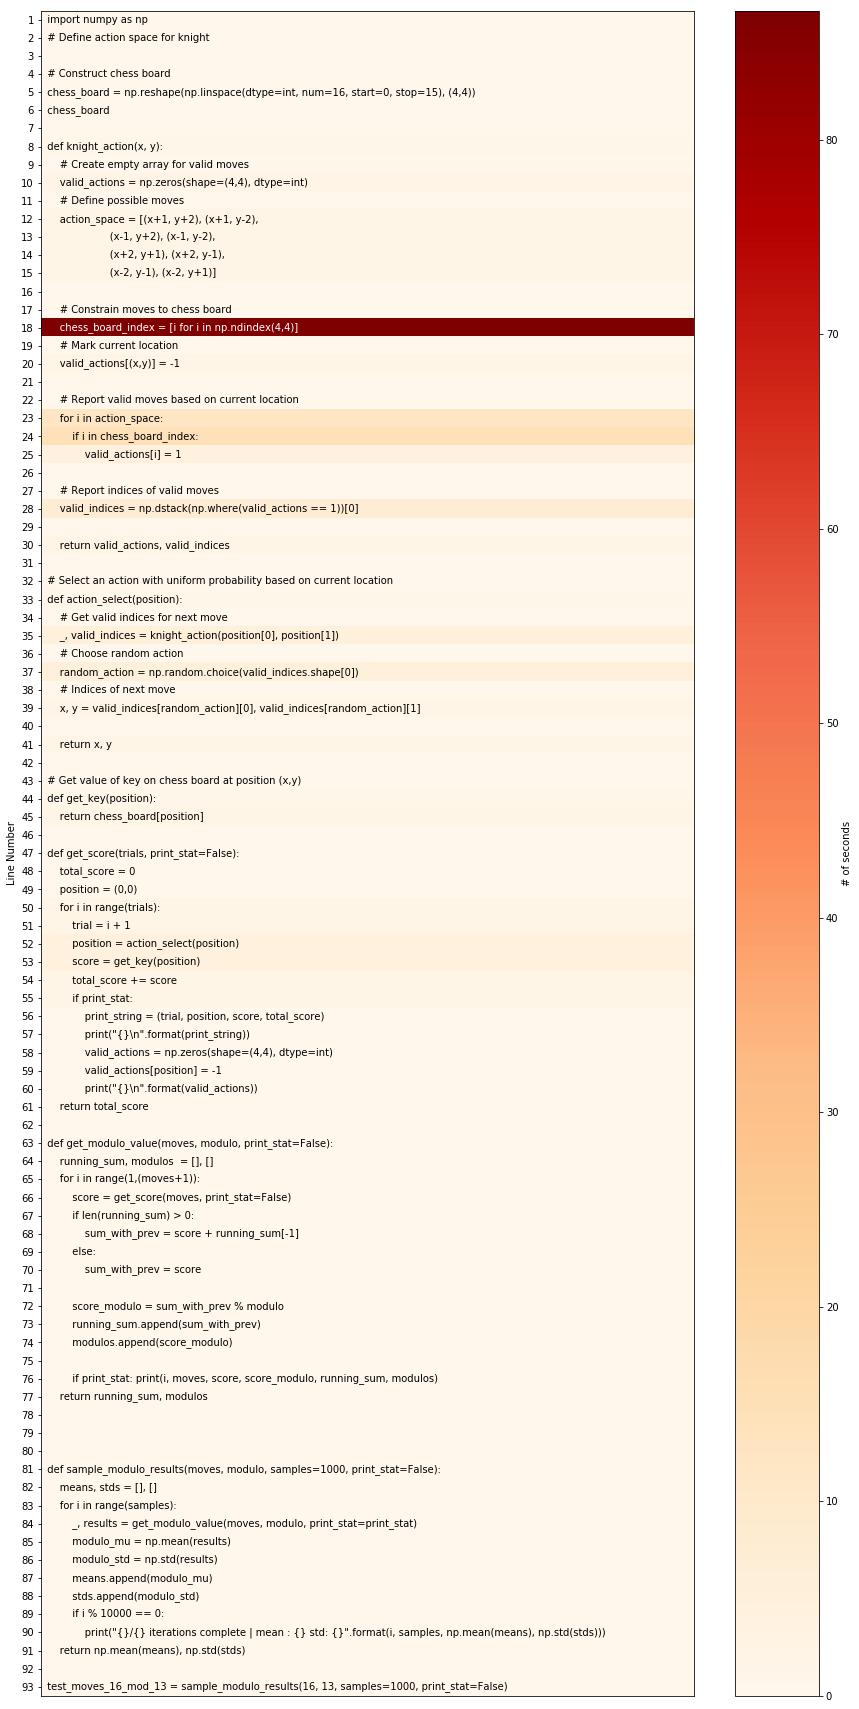

In [4]:
%%heat
import numpy as np
# Define action space for knight

# Construct chess board
chess_board = np.reshape(np.linspace(dtype=int, num=16, start=0, stop=15), (4,4))
chess_board
# Constrain moves to chess board
chess_board_index = [i for i in np.ndindex(4,4)] 

def knight_action(x, y):
    # Create empty array for valid moves
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    # Define possible moves
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    
    # Mark current location
    valid_actions[(x,y)] = -1
    
    # Report valid moves based on current location
    for i in action_space:
        if i in chess_board_index:
            valid_actions[i] = 1
    
    # Report indices of valid moves
    valid_indices = np.dstack(np.where(valid_actions == 1))[0]
    
    return valid_actions, valid_indices

# Select an action with uniform probability based on current location
def action_select(position):
    # Get valid indices for next move
    _, valid_indices = knight_action(position[0], position[1])
    # Choose random action
    random_action = np.random.choice(valid_indices.shape[0])
    # Indices of next move
    x, y = valid_indices[random_action][0], valid_indices[random_action][1]
    
    return x, y

# Get value of key on chess board at position (x,y) 
def get_key(position):
    return chess_board[position]

def get_score(trials, print_stat=False):
    total_score = 0
    position = (0,0)
    for i in range(trials):
        trial = i + 1
        position = action_select(position)
        score = get_key(position)
        total_score += score
        if print_stat:
            print_string = (trial, position, score, total_score)
            print("{}\n".format(print_string))
            valid_actions = np.zeros(shape=(4,4), dtype=int)
            valid_actions[position] = -1
            print("{}\n".format(valid_actions))
    return total_score

def get_modulo_value(moves, modulo, print_stat=False):
    running_sum, modulos  = [], []
    for i in range(1,(moves+1)):
        score = get_score(moves, print_stat=False)
        if len(running_sum) > 0:
            sum_with_prev = score + running_sum[-1]
        else:
            sum_with_prev = score

        score_modulo = sum_with_prev % modulo
        running_sum.append(sum_with_prev)
        modulos.append(score_modulo)

        if print_stat: print(i, moves, score, score_modulo, running_sum, modulos)
    return running_sum, modulos



def sample_modulo_results(moves, modulo, samples=1000, print_stat=False):
    means, stds = [], []
    for i in range(samples):
        _, results = get_modulo_value(moves, modulo, print_stat=print_stat)
        modulo_mu = np.mean(results)
        modulo_std = np.std(results)
        means.append(modulo_mu)
        stds.append(modulo_std)
        if i % 10000 == 0:
            print("{}/{} iterations complete | mean : {} std: {}".format(i, samples, np.mean(means), np.std(stds)))
    return np.mean(means), np.std(stds)

test_moves_16_mod_13 = sample_modulo_results(16, 13, samples=1000, print_stat=False)

0/1000 iterations complete | mean : 4.875 std: 0.0


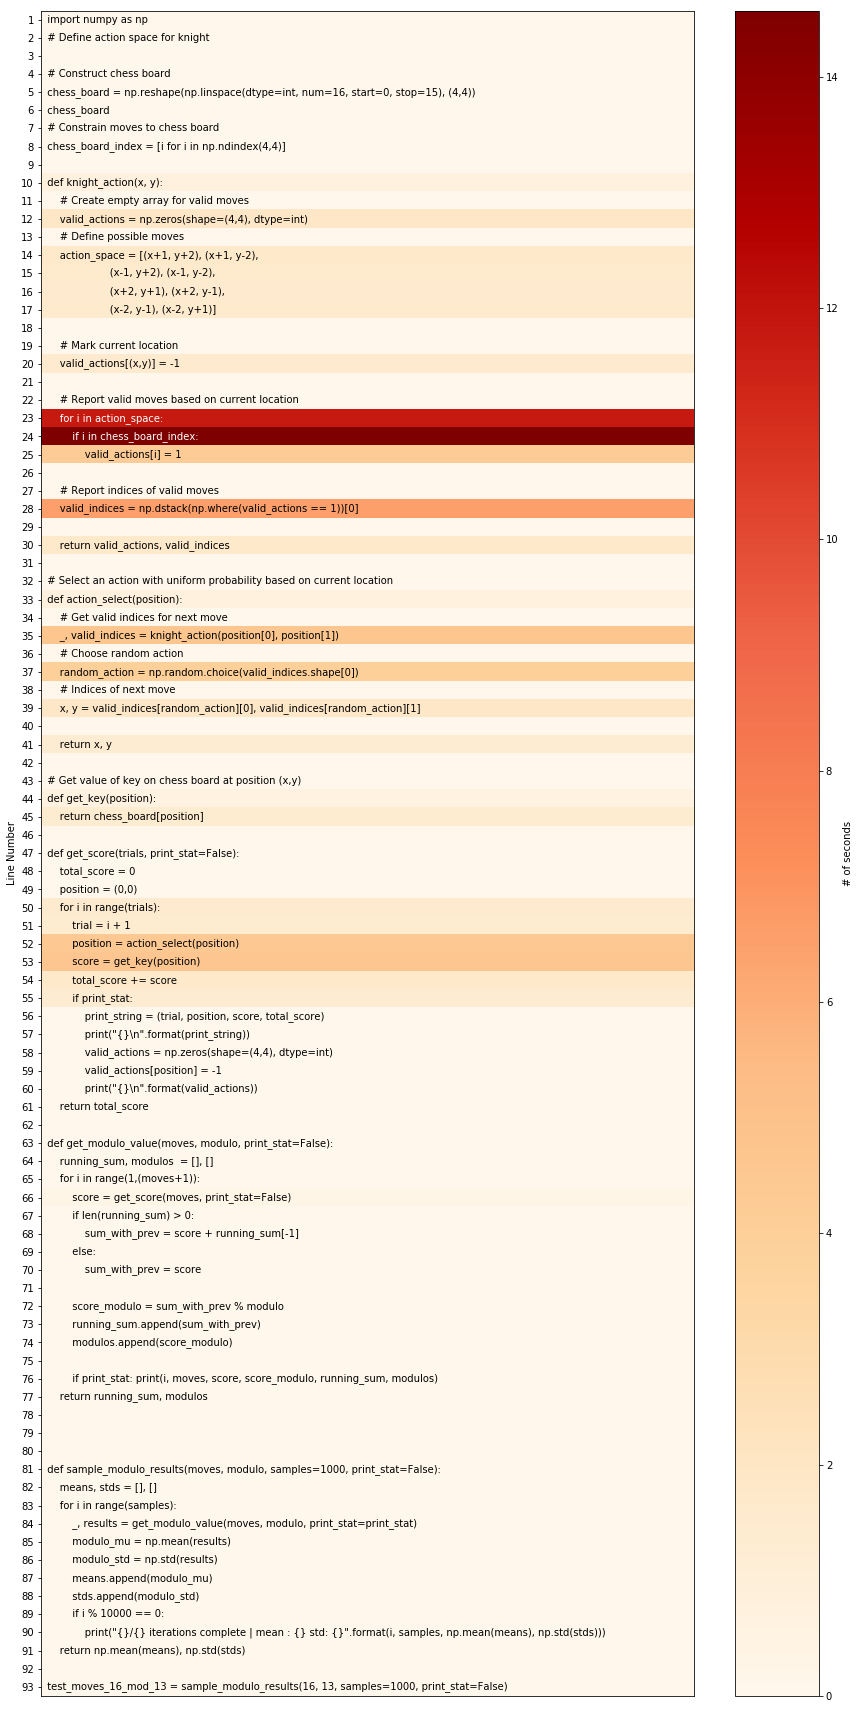

In [5]:
%%heat
import numpy as np
# Define action space for knight

# Construct chess board
chess_board = np.reshape(np.linspace(dtype=int, num=16, start=0, stop=15), (4,4))
chess_board
# Constrain moves to chess board
chess_board_index = [i for i in np.ndindex(4,4)] 

def knight_action(x, y):
    # Create empty array for valid moves
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    # Define possible moves
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    
    # Mark current location
    valid_actions[(x,y)] = -1
    
    # Report valid moves based on current location
    for i in action_space:
        if i in chess_board_index:
            valid_actions[i] = 1
    
    # Report indices of valid moves
    valid_indices = np.dstack(np.where(valid_actions == 1))[0]
    
    return valid_actions, valid_indices

# Select an action with uniform probability based on current location
def action_select(position):
    # Get valid indices for next move
    _, valid_indices = knight_action(position[0], position[1])
    # Choose random action
    random_action = np.random.choice(valid_indices.shape[0])
    # Indices of next move
    x, y = valid_indices[random_action][0], valid_indices[random_action][1]
    
    return x, y

# Get value of key on chess board at position (x,y) 
def get_key(position):
    return chess_board[position]

def get_score(trials, print_stat=False):
    total_score = 0
    position = (0,0)
    for i in range(trials):
        trial = i + 1
        position = action_select(position)
        score = get_key(position)
        total_score += score
        if print_stat:
            print_string = (trial, position, score, total_score)
            print("{}\n".format(print_string))
            valid_actions = np.zeros(shape=(4,4), dtype=int)
            valid_actions[position] = -1
            print("{}\n".format(valid_actions))
    return total_score

def get_modulo_value(moves, modulo, print_stat=False):
    running_sum, modulos  = [], []
    for i in range(1,(moves+1)):
        score = get_score(moves, print_stat=False)
        if len(running_sum) > 0:
            sum_with_prev = score + running_sum[-1]
        else:
            sum_with_prev = score

        score_modulo = sum_with_prev % modulo
        running_sum.append(sum_with_prev)
        modulos.append(score_modulo)

        if print_stat: print(i, moves, score, score_modulo, running_sum, modulos)
    return running_sum, modulos



def sample_modulo_results(moves, modulo, samples=1000, print_stat=False):
    means, stds = [], []
    for i in range(samples):
        _, results = get_modulo_value(moves, modulo, print_stat=print_stat)
        modulo_mu = np.mean(results)
        modulo_std = np.std(results)
        means.append(modulo_mu)
        stds.append(modulo_std)
        if i % 10000 == 0:
            print("{}/{} iterations complete | mean : {} std: {}".format(i, samples, np.mean(means), np.std(stds)))
    return np.mean(means), np.std(stds)

test_moves_16_mod_13 = sample_modulo_results(16, 13, samples=1000, print_stat=False)

In [ ]:
%%heat
import numpy as np
# Define action space for knight

# Construct chess board
chess_board = np.reshape(np.linspace(dtype=int, num=16, start=0, stop=15), (4,4))
chess_board

def knight_action(x, y):
    # Create empty array for valid moves
    valid_actions = np.zeros(shape=(4,4), dtype=int)
    # Define possible moves
    action_space = [(x+1, y+2), (x+1, y-2),
                    (x-1, y+2), (x-1, y-2),
                    (x+2, y+1), (x+2, y-1),
                    (x-2, y-1), (x-2, y+1)]
    
    # Constrain moves to chess board
    chess_board_index = [i for i in np.ndindex(4,4)] 
    # Mark current location
    valid_actions[(x,y)] = -1
    
    # Report valid moves based on current location
    for i in chess_board_index:
        if i in action_space:
            valid_actions[i] = 1
    
    # Report indices of valid moves
    valid_indices = np.dstack(np.where(valid_actions == 1))[0]
    
    return valid_actions, valid_indices

# Select an action with uniform probability based on current location
def action_select(position):
    # Get valid indices for next move
    _, valid_indices = knight_action(position[0], position[1])
    # Choose random action
    random_action = np.random.choice(valid_indices.shape[0])
    # Indices of next move
    x, y = valid_indices[random_action][0], valid_indices[random_action][1]
    
    return x, y

# Get value of key on chess board at position (x,y) 
def get_key(position):
    return chess_board[position]

def get_score(trials, print_stat=False):
    total_score = 0
    position = (0,0)
    for i in range(trials):
        trial = i + 1
        position = action_select(position)
        score = get_key(position)
        total_score += score
        if print_stat:
            print_string = (trial, position, score, total_score)
            print("{}\n".format(print_string))
            valid_actions = np.zeros(shape=(4,4), dtype=int)
            valid_actions[position] = -1
            print("{}\n".format(valid_actions))
    return total_score

# Return an array of values of running sum of s with specified remainder
def get_modulo_value(moves, modulo, samples=100000, print_stat=False):
    unique_s_with_modulo = []
    for i in range(samples):
        score = get_score(moves, print_stat=False)
        if score % moves == modulo:
            if score not in unique_s_with_modulo:
                if print_stat: print(i, score, moves, (score/moves))
                unique_s_with_modulo.append(score)
    return unique_s_with_modulo

moves_16_mod_13 = get_modulo_value(16, 13, samples=10000, print_stat=True)